In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from matplotlib import cm

In [23]:
bright_img_path =  './Ultrasat_BSI_L_T112181_W06_D02_ImgProj_bright_0001.tif'
dark_img_path = './Ultrasat_BSI_L_T112181_W06_D02_ImgProj_dark_0001.tif'

def get_image(path, gain):
    im = Image.open(path)
    # find th position to crop the images
    img_l = np.array(im.crop((0, 0, 4742, 4742)))
    img_h = np.array(im.crop((4742, 0, 9484, 4742)))
    # img = np.add(img, img_1)
    m, n = img_h.shape
    img_lg = img_l[4 : m - 4, 4 : n - 4]
    img_hg = img_h[4 : m - 4, 4 : n - 4]
    if gain == "low":
        return img_lg
    elif gain == "high":
        return img_hg

def get_corrected_img(bright_img_path, dark_img_path, gain):
    img = get_image(bright_img_path, gain)
    img = img.astype(np.int16, casting="same_kind")
    dark = get_image(dark_img_path, gain)
    dark = dark.astype(np.int16, casting="same_kind")
    corr_img = np.subtract(img, dark)
    return corr_img

bright_img_high  =  get_corrected_img(bright_img_path, dark_img_path, 'high')
bright_img_low  =  get_corrected_img(bright_img_path, dark_img_path, 'low')


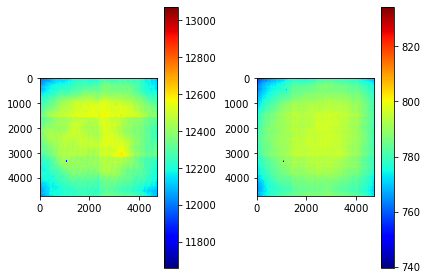

In [24]:
# displaying the images
mean_img_h = np.mean(bright_img_high)
std_img_h = np.std(bright_img_high)
mean_img_l =  np.mean(bright_img_low)
std_img_l = np.std(bright_img_low)
plt.subplot(1,2,1)
plt.imshow(bright_img_high, cmap="jet")
plt.clim(mean_img_h - 4 * std_img_h, mean_img_h + 4 * std_img_h)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(bright_img_low, cmap="jet")
plt.clim(mean_img_l - 4 * std_img_l, mean_img_l + 4 * std_img_l)
plt.colorbar()
plt.tight_layout()

## Line profile of the beam

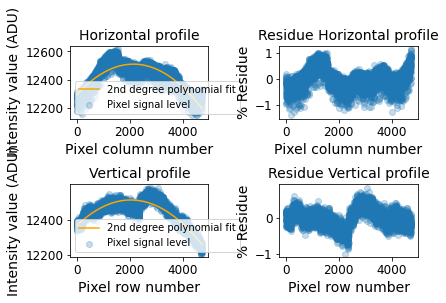

Coefficient of second degree polynomials in Horizontal fit are:  [-3.45297619e-05  1.40884169e-01  1.23653548e+04]
Coefficient of second degree polynomials in Vertical fit are: [-4.69133183e-05  2.01127891e-01  1.22953830e+04]


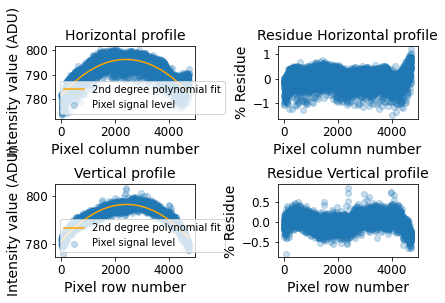

Coefficient of second degree polynomials in Horizontal fit are:  [-2.57399738e-06  1.24435590e-02  7.81339047e+02]
Coefficient of second degree polynomials in Vertical fit are: [-2.50634344e-06  1.20225691e-02  7.81728523e+02]


In [25]:
def plot_1D_profile(img):
    m, n = img.shape
    img_hor = img[(m//2)-50: (m//2)+50, :]
    img_ver = img[:, (m//2)-50: (m//2)+50]
    avg_img_hor = np.mean(img_hor, axis=0)
    # print(avg_img_hor.shape)
    cols = np.arange(0, len(avg_img_hor))
    avg_img_ver = np.mean(img_ver, axis=1)
    rows = np.arange(0, len(avg_img_ver))
    # print(avg_img_ver.shape)
    # Find a curve that fit the surface
    p_rows = np.polyfit(rows, avg_img_hor, 2)
    p_cols = np.polyfit(cols, avg_img_ver, 2)
    residue_rows = 100*(avg_img_hor-np.polyval(p_rows, rows))/avg_img_hor
    residue_cols = 100*(avg_img_ver - np.polyval(p_cols, rows)) / avg_img_hor
    # column numbers
    plt.subplot(2, 2, 1)
    plt.scatter(cols, avg_img_ver, alpha=0.25, label='Pixel signal level')
    plt.plot(cols, np.polyval(p_cols, cols), color='orange', label='2nd degree polynomial fit')
    plt.xlabel('Pixel column number', fontsize=14)
    plt.ylabel('Intensity value (ADU)', fontsize=14)
    plt.title('Horizontal profile', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.scatter(cols, residue_cols, alpha=0.25)
    plt.xlabel('Pixel column number', fontsize=14)
    plt.ylabel('% Residue', fontsize=14)
    plt.title('Residue Horizontal profile', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.subplot(2, 2, 3)
    plt.scatter(rows, avg_img_hor,  alpha=0.25, label='Pixel signal level')
    plt.plot(rows, np.polyval(p_rows, rows), color='orange', label='2nd degree polynomial fit')
    plt.xlabel('Pixel row number', fontsize=14)
    plt.ylabel('Intensity value (ADU)', fontsize=14)
    plt.title('Vertical profile', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.scatter(rows, residue_rows, alpha=0.25)
    plt.xlabel('Pixel row number', fontsize=14)
    plt.ylabel('% Residue', fontsize=14)
    plt.title('Residue Vertical profile', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    print('Coefficient of second degree polynomials in Horizontal fit are: ', p_rows)
    print('Coefficient of second degree polynomials in Vertical fit are:', p_cols)
    
# Horizontal and vertical line profile of the beam with polynomial fit. 
plot_1D_profile(bright_img_high)
plot_1D_profile(bright_img_low)

## 2D surface profile of the beam 

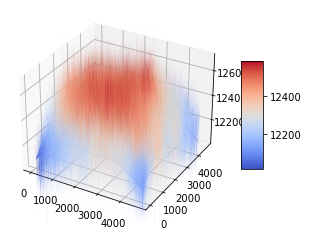

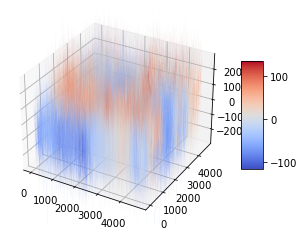

Coefficients of 2nd degree polynomial surface are: [ 1.20713122e+04  1.85578578e-01  2.09705700e-01 -1.63371988e-06
 -3.81029417e-05 -4.64349319e-05]


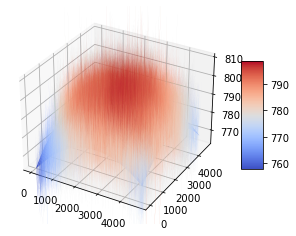

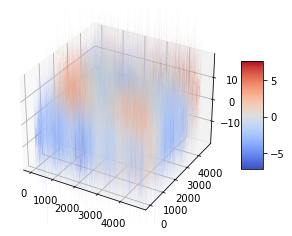

Coefficients of 2nd degree polynomial surface are: [ 7.62308505e+02  1.51160166e-02  1.31376084e-02 -3.80931183e-07
 -2.79812643e-06 -2.55679179e-06]


In [29]:
def plot_2D_profile(img):
    # plot the 3D profile of the beam.
    m, n = img.shape
    y = np.arange(0, m, 1)
    x = np.arange(0, n, 1)
    xx, yy = np.meshgrid(x, y)
    # Flatten all the arrays
    X = xx.flatten()
    Y = yy.flatten()
    Z = img.flatten()
    data = np.c_[X, Y, Z]
    # best-fit linear plane (1st-order)
    # A = np.c_[data[:, 0], data[:, 1], np.ones(data.shape[0])]
    # C, _, _, _ = scipy.linalg.lstsq(A, data[:, 2])  # coefficients
    # evaluate it on grid
    # Z = C[0] * X + C[1] * Y + C[2]

    # Fitting a quadratic surface
    A = np.c_[np.ones(data.shape[0]), data[:, :2], np.prod(data[:, :2], axis=1), data[:, :2] ** 2]
    C, _, _, _ = scipy.linalg.lstsq(A, data[:, 2])
    check_arr = np.c_[np.ones(X.shape), X, Y, X * Y, X ** 2, Y ** 2]
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(X.shape), X, Y, X * Y, X ** 2, Y ** 2], C).reshape(X.shape)
    # Reshaped array
    Reshape = Z.reshape(m, n)
    difference = img - Reshape
    # print('Mean value of the residue', np.mean(difference))
    mean_arr = np.mean(img)
    std_arr = np.std(img)
    mean_diff = np.mean(difference)
    std_diff = np.std(difference)
    # fit the surface here
    fig1 = plt.figure()
    ax = fig1.add_subplot(projection='3d')
    surf = ax.plot_surface(xx, yy, img,  cmap=cm.coolwarm) # 'plasma')
    ax.plot_surface(xx, yy, Reshape, cmap=cm.coolwarm)
    ax.set_zlim(mean_arr-2*std_arr, mean_arr+2*std_arr)
    # Add a color bar which maps values to colors.
    fig1.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    fig2 = plt.figure()
    ax1 = fig2.add_subplot(projection='3d')
    surf1 = ax1.plot_surface(xx, yy, difference, cmap=cm.coolwarm)
    ax1.set_zlim(mean_diff-2*std_diff, mean_diff+2*std_diff)
    fig2.colorbar(surf1, shrink=0.5, aspect=5)
    plt.show()
    print('Coefficients of 2nd degree polynomial surface are:', C)
    
    
# 2D surface plot of both high and low gain channels
plot_2D_profile(bright_img_high)
plot_2D_profile(bright_img_low)